In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2ef4f573deb6234c0deff1a98f65f8a3


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

50 of Set 3 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 4 | karaul
City not found. Skipping...
Processing Record 2 of Set 4 | dauphin
Processing Record 3 of Set 4 | yenagoa
Processing Record 4 of Set 4 | vestmannaeyjar
Processing Record 5 of Set 4 | berdigestyakh
Processing Record 6 of Set 4 | nome
Processing Record 7 of Set 4 | korla
Processing Record 8 of Set 4 | corinto
Processing Record 9 of Set 4 | nalut
Processing Record 10 of Set 4 | saint-esteve
Processing Record 11 of Set 4 | arraial do cabo
Processing Record 12 of Set 4 | puerto del rosario
Processing Record 13 of Set 4 | hofn
Processing Record 14 of Set 4 | san andres
Processing Record 15 of Set 4 | preobrazheniye
Processing Record 16 of Set 4 | saskylakh
Processing Record 17 of Set 4 | moyale
Processing Record 18 of Set 4 | kisangani
Processing Record 19 of Set 4 | patiya
Processing Record 20 of Set 4 | holme
Processing Record 21 of Set 4 | atar
Processing Record 22 of Set 4 | bandundu
Processing Re

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wick,58.4333,-3.0833,35.60,87,40,9.22,GB,2021-01-29 19:03:14
1,Nioro,13.3500,-15.7500,88.97,11,46,5.57,GM,2021-01-29 19:04:51
2,Clyde River,70.4692,-68.5914,-13.00,77,1,9.22,CA,2021-01-29 19:03:15
3,Guerrero Negro,27.9769,-114.0611,64.96,54,0,11.32,MX,2021-01-29 19:04:52
4,Sao Filipe,14.8961,-24.4956,77.31,57,100,8.70,CV,2021-01-29 19:04:52
5,Ushuaia,-54.8000,-68.3000,42.80,70,75,23.02,AR,2021-01-29 19:04:52
6,Ahipara,-35.1667,173.1667,59.43,77,3,5.70,NZ,2021-01-29 19:04:52
7,Rikitea,-23.1203,-134.9692,79.65,69,57,6.80,PF,2021-01-29 19:07:58
8,Carnarvon,-24.8667,113.6333,78.80,89,6,9.22,AU,2021-01-29 19:07:58
9,Winslow,35.0242,-110.6974,45.00,43,0,5.99,US,2021-01-29 19:07:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wick,GB,2021-01-29 19:03:14,58.4333,-3.0833,35.60,87,40,9.22
1,Nioro,GM,2021-01-29 19:04:51,13.3500,-15.7500,88.97,11,46,5.57
2,Clyde River,CA,2021-01-29 19:03:15,70.4692,-68.5914,-13.00,77,1,9.22
3,Guerrero Negro,MX,2021-01-29 19:04:52,27.9769,-114.0611,64.96,54,0,11.32
4,Sao Filipe,CV,2021-01-29 19:04:52,14.8961,-24.4956,77.31,57,100,8.70
5,Ushuaia,AR,2021-01-29 19:04:52,-54.8000,-68.3000,42.80,70,75,23.02
6,Ahipara,NZ,2021-01-29 19:04:52,-35.1667,173.1667,59.43,77,3,5.70
7,Rikitea,PF,2021-01-29 19:07:58,-23.1203,-134.9692,79.65,69,57,6.80
8,Carnarvon,AU,2021-01-29 19:07:58,-24.8667,113.6333,78.80,89,6,9.22
9,Winslow,US,2021-01-29 19:07:58,35.0242,-110.6974,45.00,43,0,5.99


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

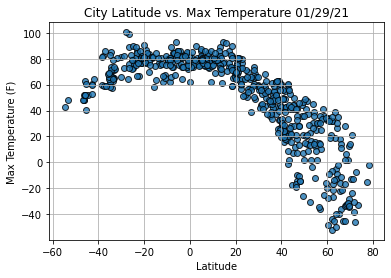

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

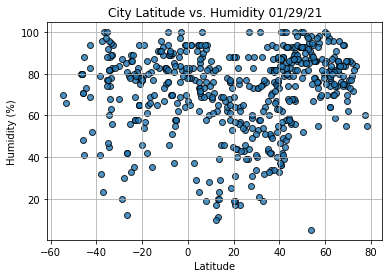

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

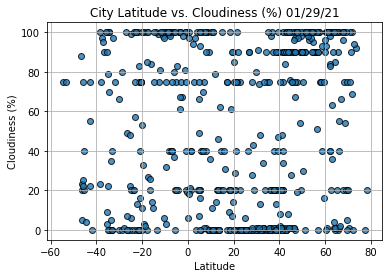

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

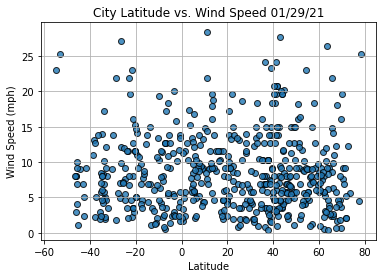

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2021-01-29 19:07:59
Lat                      -33.6500
Lng                      115.3333
Max Temp                  63.0000
Humidity                       78
Cloudiness                      0
Wind Speed                 5.0100
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
543     True
544    False
545    False
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wick,GB,2021-01-29 19:03:14,58.4333,-3.0833,35.60,87,40,9.22
1,Nioro,GM,2021-01-29 19:04:51,13.3500,-15.7500,88.97,11,46,5.57
2,Clyde River,CA,2021-01-29 19:03:15,70.4692,-68.5914,-13.00,77,1,9.22
3,Guerrero Negro,MX,2021-01-29 19:04:52,27.9769,-114.0611,64.96,54,0,11.32
4,Sao Filipe,CV,2021-01-29 19:04:52,14.8961,-24.4956,77.31,57,100,8.70


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

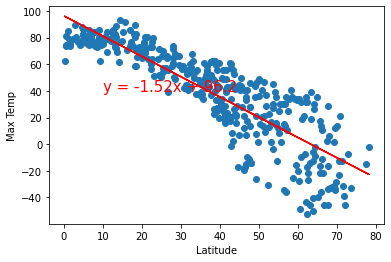

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

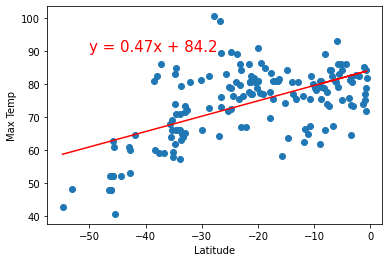

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

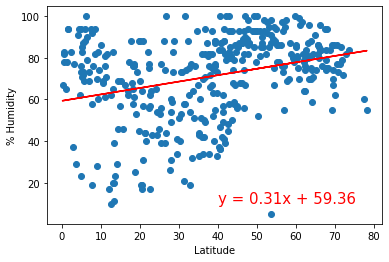

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

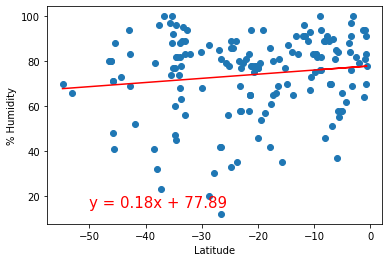

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

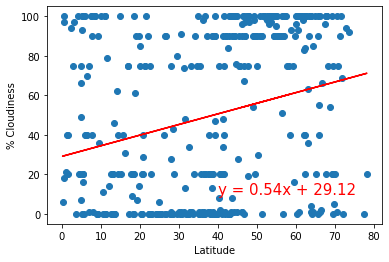

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

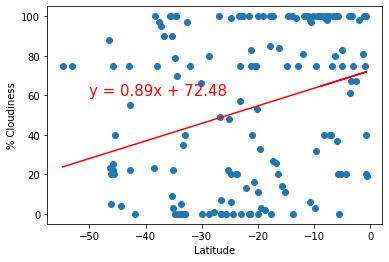

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

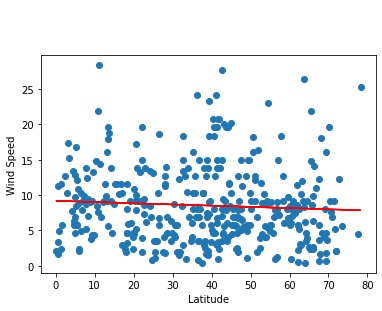

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

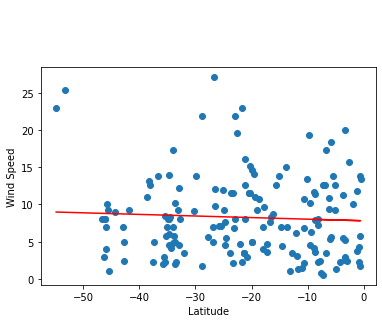

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))